# Jacobi Method
* Use Jacobi method to solve a system of linear equations Ax=b with an initial guess x0 = [0, 0]
* Decompose matrix A into A = L + D + U
* Find the steps required to converge to the solution. 
* Plot the error vs step

In [2]:
import numpy as np
from numpy.linalg import inv, norm
import matplotlib.pyplot as plt

In [58]:
#Jacobi Method
# Input: matrix A, vector b, and tolerance
# Output: solution x, number of steps, list of errors using backward error
def jacobi(A,b,tol):
    D = np.diag(np.diag(A))
    U = (np.triu(A)-D)
    L = (np.tril(A)-D)
    
    err = 1
    errs = list()
    step = 0
    x_old = np.zeros((len(b),1))
    while err > tol:
        x = inv(D).dot(b -(L+U).dot(x_old))
        err = norm(b-A.dot(x), 2)
        errs.append(err)
        x_old = x
        step += 1
    return [x,step,errs]

# Example 1

In [59]:
A1 = np.array([[3,1],[1,2]])
b1 = np.array([[5],[5]])

In [60]:
print("A = ")
print(A1)
print("b = ")
print(b1)

A = 
[[3 1]
 [1 2]]
b = 
[[5]
 [5]]


In [61]:
tol = 10**-6
[x, step, err] = jacobi(A1,b1,tol)
print("The solution is: ")
print(x)
print("The number of steps required to converge are: ")
print(step)

The solution is: 
[[ 0.9999999]
 [ 1.9999998]]
The number of steps required to converge are: 
18


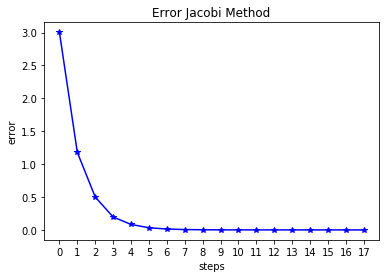

In [62]:
%matplotlib inline
plt.plot(err,'b*-')
plt.title("Error Jacobi Method")
plt.xticks(np.arange(0,len(err)))
plt.xlabel("steps")
plt.ylabel("error")

# Example 2

In [63]:
A2 = np.array([[3,1,-1],[2,4,1],[-1,2,5]])
print("A = ")
print(A2)

b2 = np.array([[4],[1],[1]])
print("b = ")
print(b2)

A = 
[[ 3  1 -1]
 [ 2  4  1]
 [-1  2  5]]
b = 
[[4]
 [1]
 [1]]


In [64]:
tol = 10**-6
[x, step, err] = jacobi(A2,b2,tol)
print("The solution is: ")
print(x)
print("The number of steps required to converge are: ")
print(step)

The solution is: 
[[ 1.99999969]
 [-0.99999967]
 [ 0.99999971]]
The number of steps required to converge are: 
39


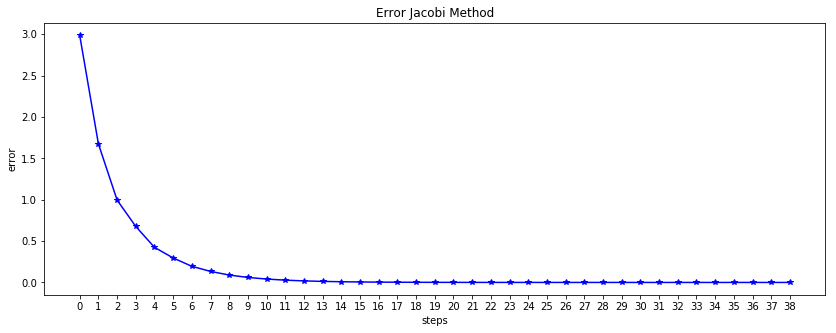

In [71]:
plt.figure(figsize=(14,5))
plt.plot(err,'b*-')
plt.title("Error Jacobi Method")
plt.xticks(np.arange(0,len(err)))
plt.xlabel("steps")
plt.ylabel("error")